In [10]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import statsmodels.api as sm
from sklearn.preprocessing import PolynomialFeatures

In [5]:
df = pd.read_csv('Polynomial-Dataset.csv')
df.head(10)

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


### Data Exploration

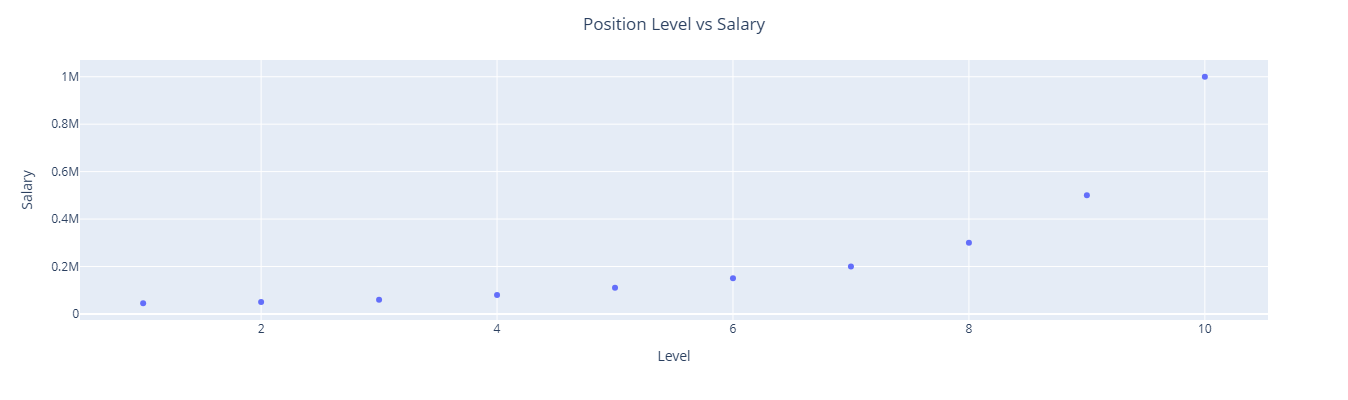

In [9]:
fig = px.scatter(df, x='Level', y='Salary')
fig.update_layout(
    title='Position Level vs Salary'
    , title_x=.5
    , width=400
    , height=400
)
fig.show()

### Assigning Variables

In [21]:
x = df[['Level']]
y = df[['Salary']]
x

,Level
0,1
1,2
2,3
3,4
4,5
5,6
6,7
7,8
8,9
9,10


### Transforming X Axis

In [22]:
#second degree used here as it will fit the above graph the best
poly_reg = PolynomialFeatures(degree=2)
x_poly = poly_reg.fit_transform(x)
x_poly

array([[  1.,   1.,   1.],
       [  1.,   2.,   4.],
       [  1.,   3.,   9.],
       [  1.,   4.,  16.],
       [  1.,   5.,  25.],
       [  1.,   6.,  36.],
       [  1.,   7.,  49.],
       [  1.,   8.,  64.],
       [  1.,   9.,  81.],
       [  1.,  10., 100.]])

### Fitting Models for Exploration

In [28]:
#first linear
linear_reg = LinearRegression()
linear_reg.fit(x,y)

#then polynomial
poly_reg = LinearRegression()
poly_reg.fit(x_poly,y)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [31]:
#creating predicted values from the fit, first for poly then for linear
y_pred_poly = poly_reg.predict(x_poly)
y_pred_lin = linear_reg.predict(x)

### Graphing Predictions vs Actual

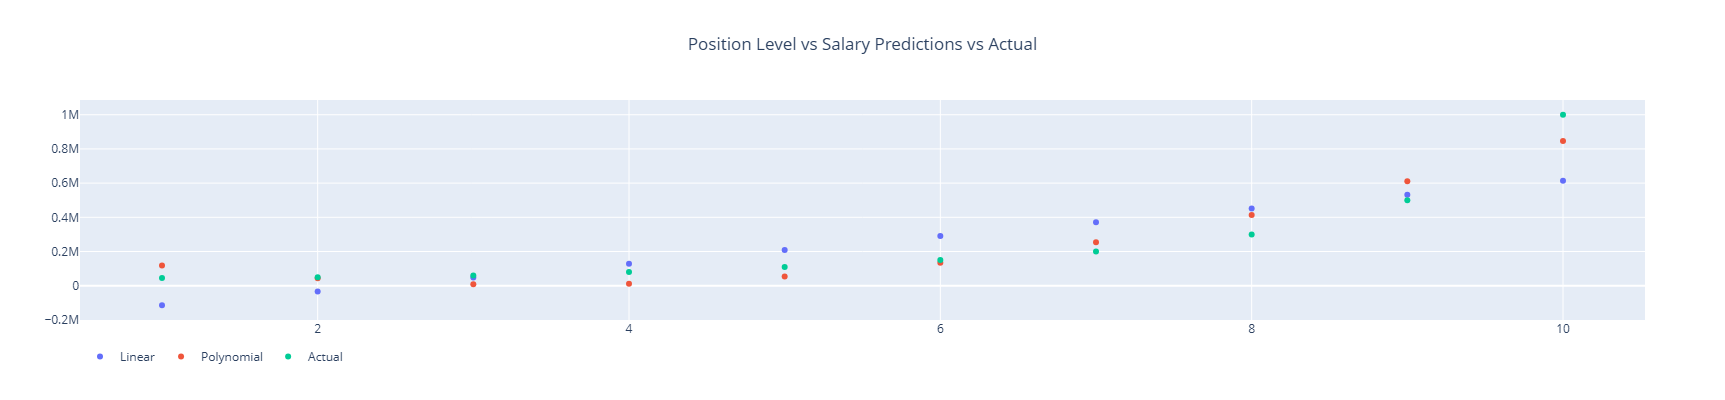

In [63]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=x.Level.values, y=y_pred_lin.flatten().round(2), mode='markers', name='Linear'))
fig.add_trace(go.Scatter(x=x.Level.values, y=y_pred_poly.flatten().round(2), mode='markers', name='Polynomial'))
fig.add_trace(go.Scatter(x=x.Level.values, y=y.Salary.values, mode='markers', name='Actual'))
fig.update_layout(
    title='Position Level vs Salary Predictions vs Actual'
    , title_x=.5
    , width=400
    , height=400
    , legend_orientation='h'
)
fig.show()

### Coefficient Examination

In [82]:
print(f'Linear Regression coefficients: {round(linear_reg.coef_[0][0], 1)}')
print(f'Polynomial Fit Regression coefficients: x,{poly_reg.coef_[0][1]} ,x_squared, {poly_reg.coef_[0][2]}')

Linear Regression coefficients: 80878.8
Polynomial Fit Regression coefficients: x,-132871.21212121213 ,x_squared, 19431.81818181819
